In [1]:
# Imports

import keras
from keras.preprocessing import image
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tqdm import tqdm

Using TensorFlow backend.


## Get paths for images

In [2]:
# Get paths for training images

df = pd.read_csv("../data/train_data.csv")
df.head()

image_id    ques_id                                     question   answer
0    458752  458752000    What is this photo taken looking through?      net
1    458752  458752001           What position is this man playing?  pitcher
2    458752  458752002             What color is the players shirt?   orange
3    458752  458752003  Is this man a professional baseball player?      yes
4    262146  262146000                      What color is the snow?    white

In [3]:
img_id = np.unique(df['image_id'])

82783

In [8]:
img_paths = ['../data/train/images/COCO_train2014_'+'0'*(12-len(str(i)))+str(i)+'.jpg' for i in img_id]

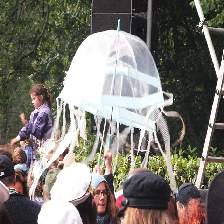

In [42]:
img = image.load_img(img_paths[1111], target_size=(224, 224))
img

## Extract image features 

In [155]:
# images = []
# for i in tqdm(img_paths):
#     img = image.load_img(i, target_size=(224, 224))
#     img_data = image.img_to_array(img)
#     img_data = np.expand_dims(img_data, axis=0)
#     img_data = preprocess_input(img_data)
#     images.append(img_data)

    
    

  6%|▋         | 5251/82783 [03:10<47:10, 27.39it/s]

In [21]:
path = "../data/train"

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

In [23]:
test_generator = test_datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        batch_size=512)

Found 82783 images belonging to 1 classes.


In [24]:
# Get filenames and count
filenames = test_generator.filenames
nb_samples = len(filenames)
nb_samples

82783

In [26]:
filenames[-10:]

['images/COCO_train2014_000000581880.jpg',
 'images/COCO_train2014_000000581881.jpg',
 'images/COCO_train2014_000000581882.jpg',
 'images/COCO_train2014_000000581884.jpg',
 'images/COCO_train2014_000000581900.jpg',
 'images/COCO_train2014_000000581903.jpg',
 'images/COCO_train2014_000000581904.jpg',
 'images/COCO_train2014_000000581906.jpg',
 'images/COCO_train2014_000000581909.jpg',
 'images/COCO_train2014_000000581921.jpg']

# Load pre-trained model

In [183]:
model = DenseNet121(weights='imagenet', include_top=False)
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [ ]:
image_features = model.predict_generator(test_generator,steps = np.ceil(nb_samples/512),verbose=1)



 75/162 [============>.................] - ETA: 22:28

In [230]:
np.save("features_densenet.npy",image_features)


In [13]:
feat = np.load("../data/features_densenet.npy")

In [15]:
feat.shape

(82783, 7, 7, 1024)

##  Extract Question features

In [ ]:
To do 

In [ ]:
https://www.analyticsvidhya.com/blog/2019/03/learn-to-use-elmo-to-extract-features-from-text/

In [ ]:
https://towardsdatascience.com/bert-in-keras-with-tensorflow-hub-76bcbc9417b

In [ ]:
https://github.com/strongio/keras-bert/blob/master/keras-bert.ipynb

In [ ]:
https://github.com/strongio/keras-elmo/blob/master/Elmo%20Keras.ipynb